In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [120]:
df_all = pd.read_csv('../../data/fanfic_regression_data_20211216_topic_only_no_crossover.tsv', sep = '\t')

In [121]:
df_all.head(2)

,Chapters,Kudos,Words,Comments,Hits,Bookmarks,URL,Dist,Topic_novelty,Freq_relationship,...,Fandom_shakespare,Fandom_hetalia,Fandom_attack_on_titan,Fandom_ms_paint_adventures,Fandom_marvel,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,History,kudos_hit_ratio
0,24,53.0,66258.0,20,57576.0,504,http://archiveofourown.org/works/488677/chapte...,"[2.7186147e-07, 2.7186147e-07, 2.7186147e-07, ...",0.245356,0,...,0,0,0,0,0,0,0,0,5029.0,-6.990569
1,1,80.0,3542.0,3,2333.0,7,http://archiveofourown.org/works/208853?view_a...,"[4.848601e-06, 4.848601e-06, 4.848601e-06, 4.8...",0.165296,1,...,0,0,0,0,0,0,0,0,5034.0,-3.372884


In [122]:
df_all = df_all[df_all['Fandom_star_wars']==1]

In [123]:
len(df_all)

15234

In [124]:
df_all['Topic_novelty'].head()

94584    0.251408
94585    0.282793
94586    0.251944
94587    0.679319
94588    0.247665
Name: Topic_novelty, dtype: float64

In [125]:
topic_ave = np.average(df_all['Topic_novelty'])
df_all['Topic_novelty_cent'] = df_all['Topic_novelty'] - topic_ave
df_all['Topic_novelty_squared'] = np.square(df_all['Topic_novelty_cent'])

In [126]:
len(df_all)

15234

In [127]:
df_all['kudos_hit_ratio'].head()

94584    0.000000
94585   -4.614359
94586   -3.543426
94587   -3.179355
94588    0.000000
Name: kudos_hit_ratio, dtype: float64

In [128]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
# subset = df_all[['Chapters', 'Words','Freq_relationship', 'Category_F_F', 'Category_F_M',
#        'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
#        'ArchiveWarnings_underage',
#        'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
#        'ArchiveWarnings_violence',
#        'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
#        'Rating_N', 'Rating_T',
#        'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
#        'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
#        'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
#        'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
#        'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
#        'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
#        'Fandom_ms_paint_adventures', 'Fandom_marvel',
#        'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
#        'History']]

In [130]:
# for i in range(len(subset.columns.values)):
#     print(subset.columns.values[i], variance_inflation_factor(subset.values, i))

In [131]:
# df_t = df_all[df_all['Fandom_marvel'] == 1]

### Logistic

In [132]:
df_all.columns.values

array(['Chapters', 'Kudos', 'Words', 'Comments', 'Hits', 'Bookmarks',
       'URL', 'Dist', 'Topic_novelty', 'Freq_relationship',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon',
       'author_fic_cnt', 'Rating_E', 'Rating_G', 'Rating_M', 'Rating_N',
       'Rating_T', 'Fandom_harry_potter', 'Fandom_dcu',
       'Fandom_doctor_who', 'Fandom_star_wars', 'Fandom_arthurian',
       'Fandom_supernatural', 'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures'

In [133]:
def run_logit(df, field, sq_option):
    df['Intercept'] = 1.0
    df['binary'] = df[field].apply(lambda x: 1 if x != 0.0 else 0)
    if sq_option:
        logit_model = sm.Logit(df['binary'], df[['Topic_novelty', 'Topic_novelty_squared',\
             'Chapters', 'author_fic_cnt', 'Freq_relationship','Category_F_F', 'Category_F_M',\
           'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other', \
           'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
           'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
           'ArchiveWarnings_violence',\
            'Rating_G',\
           'Rating_M', 'Rating_N', 'Rating_T', \
            'Intercept']]).fit(method='bfgs')
    else:
        logit_model = sm.Logit(df['binary'], df[['Topic_novelty',\
         'Chapters', 'author_fic_cnt', 'Freq_relationship', 'Category_F_F', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
       'ArchiveWarnings_violence',\
        'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T', \
        'Intercept']]).fit(method='bfgs')
    pred = logit_model.predict()
    df['nonzero_prob'] = pred
    return df

### OLS

In [134]:
def run_ols(df, field, sq_option):
    df = run_logit(df, field, sq_option=sq_option)
    df = df[df[field] != 0]
    if field != 'kudos_hit_ratio':
        df[field] = np.log(df[field])
    print(len(df))
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    print(len(df))
    if sq_option:
        model = ols( field + " ~ Topic_novelty +  Topic_novelty_squared\
         +  Chapters + author_fic_cnt + Freq_relationship\
     + Category_Gen + Category_F_F + Category_F_M + Category_M_M + Category_Multi + Category_Other  \
     + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
     ArchiveWarnings_choose_no +\
     ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
     + nonzero_prob", data = df).fit()
    else:
        model = ols( field + " ~ \
         Topic_novelty  + \
     + Chapters + author_fic_cnt + Freq_relationship\
     + Category_Gen + Category_F_F + Category_F_M + Category_M_M + Category_Multi + Category_Other  \
     + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
     ArchiveWarnings_choose_no +\
     ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
     + nonzero_prob", data = df).fit()
    return model

### Plot coefficients

In [135]:
def run_all():
    global kudos_model_sq_True, kudos_coef_sq_True, kudos_err_sq_True
    global hits_model_sq_True, hits_coef_sq_True, hits_err_sq_True
    global comments_model_sq_True,comments_coef_sq_True, comments_err_sq_True
    global bookmarks_model_sq_True, bookmarks_coef_sq_True, bookmarks_err_sq_True
    global kudos_hits_ratio_model_sq_True, kudos_hits_ratio_coef_sq_True, kudos_hits_ratio_err_sq_True
    global ylabels_sq_True

    global kudos_model_sq_False, kudos_coef_sq_False, kudos_err_sq_False
    global hits_model_sq_False, hits_coef_sq_False, hits_err_sq_False
    global comments_model_sq_False,comments_coef_sq_False, comments_err_sq_False
    global bookmarks_model_sq_False, bookmarks_coef_sq_False, bookmarks_err_sq_False
    global kudos_hits_ratio_model_sq_False, kudos_hits_ratio_coef_sq_False, kudos_hits_ratio_err_sq_False

    global ylabels_sq_False
    
    kudos_model_sq_True = run_ols(df_all, 'Kudos', sq_option=True)
    kudos_coef_sq_True = np.asarray(list(kudos_model_sq_True.params)[1:-1])
    kudos_err_sq_True = list(kudos_model_sq_True.bse)[1:-1]
    
    hits_model_sq_True = run_ols(df_all, 'Hits', sq_option=True)
    hits_coef_sq_True = list(hits_model_sq_True.params)[1:-1]
    hits_err_sq_True = list(hits_model_sq_True.bse)[1:-1]
    
    comments_model_sq_True = run_ols(df_all, 'Comments', sq_option=True)
    comments_coef_sq_True = list(comments_model_sq_True.params)[1:-1]
    comments_err_sq_True = list(comments_model_sq_True.bse)[1:-1]
    
    bookmarks_model_sq_True = run_ols(df_all, 'Bookmarks', sq_option=True)
    bookmarks_coef_sq_True = list(bookmarks_model_sq_True.params)[1:-1]
    bookmarks_err_sq_True = list(bookmarks_model_sq_True.bse)[1:-1]
    
    kudos_hits_ratio_model_sq_True = run_ols(df_all, 'kudos_hit_ratio', sq_option=True)
    kudos_hits_ratio_coef_sq_True = list(kudos_hits_ratio_model_sq_True.params)[1:-1]
    kudos_hits_ratio_err_sq_True = list(kudos_hits_ratio_model_sq_True.bse)[1:-1]

    kudos_model_sq_False = run_ols(df_all, 'Kudos', sq_option=False)
    kudos_coef_sq_False = np.asarray(list(kudos_model_sq_False.params)[1:-1])
    kudos_err_sq_False = list(kudos_model_sq_False.bse)[1:-1]
    
    hits_model_sq_False = run_ols(df_all, 'Hits', sq_option=False)
    hits_coef_sq_False = list(hits_model_sq_False.params)[1:-1]
    hits_err_sq_False = list(hits_model_sq_False.bse)[1:-1]
    
    comments_model_sq_False = run_ols(df_all, 'Comments', sq_option=False)
    comments_coef_sq_False = list(comments_model_sq_False.params)[1:-1]
    comments_err_sq_False = list(comments_model_sq_False.bse)[1:-1]
    
    bookmarks_model_sq_False = run_ols(df_all, 'Bookmarks', sq_option=False)
    bookmarks_coef_sq_False = list(bookmarks_model_sq_False.params)[1:-1]
    bookmarks_err_sq_False = list(bookmarks_model_sq_False.bse)[1:-1]
    
    kudos_hits_ratio_model_sq_False = run_ols(df_all, 'kudos_hit_ratio', sq_option=False)
    kudos_hits_ratio_coef_sq_False = list(kudos_hits_ratio_model_sq_False.params)[1:-1]
    kudos_hits_ratio_err_sq_False = list(kudos_hits_ratio_model_sq_False.bse)[1:-1]

In [136]:
run_all()

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site

         Current function value: 0.070177
         Iterations: 35
         Function evaluations: 70
         Gradient evaluations: 66
15003
15003
         Current function value: 0.082975
         Iterations: 35
         Function evaluations: 73
         Gradient evaluations: 63
14982
14982


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.p

         Current function value: 0.502702
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40
11712
11712
         Current function value: 0.381983
         Iterations: 35
         Function evaluations: 53
         Gradient evaluations: 48
12942
12942


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/si

         Current function value: 0.135992
         Iterations: 35
         Function evaluations: 69
         Gradient evaluations: 65
14751
14751
         Current function value: 0.070174
         Iterations: 35
         Function evaluations: 70
         Gradient evaluations: 66
15003
15003


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site

         Current function value: 0.083386
         Iterations: 35
         Function evaluations: 64
         Gradient evaluations: 54
14982
14982
         Current function value: 0.502748
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40
11712
11712


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/anaconda3/envs/py37/lib/python3.7/si

         Current function value: 0.382011
         Iterations: 35
         Function evaluations: 53
         Gradient evaluations: 48
12942
12942
         Current function value: 0.135997
         Iterations: 35
         Function evaluations: 69
         Gradient evaluations: 65
14751
14751


In [137]:
comments_model_sq_True.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Comments   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     185.0
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:44:51   Log-Likelihood:                -17501.
No. Observations:               11712   AIC:                         3.505e+04
Df Residuals:                   11690   BIC:                         3.521e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -1.4351      0.230     -6.236      0.000      -1.886      -0.984
Topic_novelty                -1.0392      0.104     -9.989      0.000      -1.243      -0.835
Topic_novelty_squared         0.2221      0.593      0.374      0.708      -0.941       1.385
Chapters                      0.0274      0.003     10.025      0.000       0.022       0.033
author_fic_cnt              1.76e-05   2.94e-05      0.599      0.549      -4e-05    7.52e-05
Freq_relationship            -0.0783      0.039     -1.992      0.046      -0.155      -0.001
Category_Gen               2.074e-05      0.031      0.001      0.999      -0.061       0.061
Category_F_F                  0.1675      0.050      3.346      0.001       0.069       0.266
Category_F_M                 -0.0987      0.029     -3.436      0.001      -0.155      -0.042
Category_M_M                 -0.1935      0.046     -4.193      0.000      -0.284      -0.103
Category_Multi               -0.0761      0.044     -1.714      0.087      -0.163       0.011
Category_Other                0.1389      0.075      1.842      0.065      -0.009       0.287
ArchiveWarnings_underage     -0.1206      0.104     -1.162      0.245      -0.324       0.083
ArchiveWarnings_death         0.0734      0.049      1.491      0.136      -0.023       0.170
ArchiveWarnings_violence      0.4267      0.049      8.648      0.000       0.330       0.523
ArchiveWarnings_choose_no     0.2002      0.029      6.846      0.000       0.143       0.257
ArchiveWarnings_noncon       -0.1112      0.068     -1.647      0.100      -0.244       0.021
Rating_N                      0.1790      0.047      3.813      0.000       0.087       0.271
Rating_E                      0.3775      0.035     10.879      0.000       0.309       0.445
Rating_M                      0.2605      0.035      7.355      0.000       0.191       0.330
Rating_T                      0.2571      0.028      9.169      0.000       0.202       0.312
nonzero_prob                  4.7871      0.309     15.502      0.000       4.182       5.392
==============================================================================
Omnibus:                       79.796   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.282
Skew:                          -0.204   Prob(JB):                     2.24e-18
Kurtosis:                       3.027   Cond. No.                     2.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
kudos_hits_ratio_coef_sq_True

[1.6133030390983063,
 -9.161395368932023,
 -0.10902403183869823,
 -4.5093220458294723e-05,
 0.22239436818665237,
 0.02238716922902756,
 -0.06900904429075275,
 -0.012743903170471083,
 0.30406328399355337,
 0.17887425964876927,
 -0.32924686387008095,
 -0.40198087453983056,
 -0.19859688926364016,
 -0.3555348381130165,
 -0.19142476532951924,
 -0.35025046586519826,
 -0.1663144634485985,
 -0.4156071320765584,
 -0.24326499996616652,
 -0.2230245414269816]

In [139]:
def plot_ax(ax, title, coef, err, xlim_left, xlim_right, sq_option, ylabels, rsquared=0, xlabel='', \
            ylabel_flag=False, partial=False):
    
    ax.errorbar(coef[::-1], range(len(coef)), xerr=err[::-1] , fmt='o')
    ax.set_yticks(range(len(ylabels)))
    ax.set_xticks(range(int(xlim_left), int(xlim_right)+2, 2))

    if ylabel_flag:
        ax.set_yticklabels(ylabels)
    else:
        ax.set_yticklabels([])
    ax.plot([0 for i in range(len(ylabels)+2)], range(-1,len(ylabels)+1), c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [21.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [25.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [30.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    ax.plot(range(-8,10), [36.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
#     if sq_option:
#         ax.plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
#     else:
#         ax.plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
    if partial:
        ax.set_ylim(26.5,len(ylabels))
    else:
        ax.set_ylim(-0.5,len(ylabels))
    ax.set_xlim(xlim_left,xlim_right)
    if xlabel != '':
        ax.set_xlabel(xlabel, fontsize=15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    if partial:
        ax.text(0.27, 0.9, '$R^2={}$'.format(rsquared), fontsize=15, transform=ax.transAxes)
    else:
        ax.text(0.2, 0.98, '$R^2={}$'.format(rsquared), fontsize=15, transform=ax.transAxes)
    ax.set_title(title, fontsize=15)

In [140]:
def plot_fig(partial=False):
    if partial:
        fig, axes = plt.subplots(2,5,figsize = (13,7))
    else:
        fig, axes = plt.subplots(2,5,figsize = (13,24))
        
    ylabel_sq_True =['Topic novelty', 'Topic novelty squared',\
                     'Chapters', ' Author work count', 'Frequent relationship',\
         'Category (General)','Category (Female/Female)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)',\
         'ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
         ArchiveWarnings (Non-consensual)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)',\
         ][::-1]
    ylabel_sq_False =['Topic novelty','Chapters', \
         ' Author work count','Frequent relationship',\
         'Category (General)','Category (Female/Female)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)',\
         'ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
         ArchiveWarnings (Non-consensual)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)',\
        ][::-1]
    
    plot_ax(ax=axes[0][0],title='', ylabels=ylabel_sq_False, sq_option=False, coef=hits_coef_sq_False, err=hits_err_sq_False, xlim_left=min(hits_coef_sq_False)-1, xlim_right=max(hits_coef_sq_False)+1, rsquared=hits_model_sq_False.rsquared.round(3), partial=partial, ylabel_flag=True, xlabel='')
    plot_ax(ax=axes[0][1], title='', ylabels=ylabel_sq_False, sq_option=False, coef=kudos_coef_sq_False, err=kudos_err_sq_False, xlim_left=min(kudos_coef_sq_False)-1, xlim_right=max(kudos_coef_sq_False)+1, rsquared=kudos_model_sq_False.rsquared.round(3), partial=partial,  xlabel='')
    plot_ax(ax=axes[0][2], title='', ylabels=ylabel_sq_False, sq_option=False, coef=comments_coef_sq_False, err=comments_err_sq_False, partial=partial, xlim_left=min(comments_coef_sq_False)-1, xlim_right=max(comments_coef_sq_False)+1, rsquared=comments_model_sq_False.rsquared.round(3), xlabel='')
    plot_ax(ax=axes[0][3], title='',ylabels=ylabel_sq_False, sq_option=False, coef=bookmarks_coef_sq_False, err=bookmarks_err_sq_False, partial=partial,xlim_left=min(bookmarks_coef_sq_False)-1, xlim_right=max(bookmarks_coef_sq_False)+1, rsquared=bookmarks_model_sq_False.rsquared.round(3), xlabel='')
    plot_ax(ax=axes[0][4], title='',ylabels=ylabel_sq_False, sq_option=False, coef=kudos_hits_ratio_coef_sq_False, err=kudos_hits_ratio_err_sq_False, partial=partial,xlim_left=min(kudos_hits_ratio_coef_sq_False)-1, xlim_right=max(kudos_hits_ratio_coef_sq_False)+1, rsquared=kudos_hits_ratio_model_sq_False.rsquared.round(3), xlabel='')

    plot_ax(ax=axes[1][0], title='',ylabels=ylabel_sq_True, sq_option=True, coef=hits_coef_sq_True, err=hits_err_sq_True, xlabel='Hits', xlim_left=min(hits_coef_sq_True)-1, xlim_right=max(hits_coef_sq_True)+1, rsquared=hits_model_sq_True.rsquared.round(3),ylabel_flag=True, partial=partial)
    plot_ax(ax=axes[1][1], title='',ylabels=ylabel_sq_True, sq_option=True, coef=kudos_coef_sq_True, err=kudos_err_sq_True, xlim_left=min(kudos_coef_sq_True)-1, xlim_right=max(kudos_coef_sq_True)+1, rsquared=kudos_model_sq_True.rsquared.round(3), xlabel='Kudos', partial=partial)
    plot_ax(ax=axes[1][2], title='', ylabels=ylabel_sq_True, sq_option=True, coef=comments_coef_sq_True, err=comments_err_sq_True, partial=partial, xlim_left=min(comments_coef_sq_True)-1, xlim_right=max(comments_coef_sq_True)+1, rsquared=comments_model_sq_True.rsquared.round(3), xlabel='Comments')
    plot_ax(ax=axes[1][3], title='',ylabels=ylabel_sq_True, sq_option=True, coef=bookmarks_coef_sq_True, err=bookmarks_err_sq_True, partial=partial,xlim_left=min(bookmarks_coef_sq_True)-1, xlim_right=max(bookmarks_coef_sq_True)+1, rsquared=bookmarks_model_sq_True.rsquared.round(3), xlabel='Bookmarks')
    plot_ax(ax=axes[1][4], title='',ylabels=ylabel_sq_True, sq_option=True, coef=kudos_hits_ratio_coef_sq_True, err=kudos_hits_ratio_err_sq_True, partial=partial,xlim_left=min(kudos_hits_ratio_coef_sq_True)-1, xlim_right=max(kudos_hits_ratio_coef_sq_True)+1, rsquared=kudos_hits_ratio_model_sq_True.rsquared.round(3), xlabel='Kudos to Hits Ratio')

#     plt.figtext(0.5, 0.99, 'Models 1-4', fontsize=25)
#     plt.figtext(0.5, 0.49, 'Models 5-8', fontsize=25)

    if partial:
        plt.figtext(0.13, 0.93, 'a', fontsize=25)
        plt.figtext(0.13, 0.5, 'b', fontsize=25)
    else:
        plt.figtext(0.13, 0.98, 'a', fontsize=25)
        plt.figtext(0.13, 0.49, 'b', fontsize=25)

    plt.tight_layout()
#     plt.savefig('ols_coefs_partial={}_topic_only_no_crossover_buffy.pdf'.format(partial), format='pdf')

In [141]:
# plot_fig(partial=True)

<IPython.core.display.Javascript object>


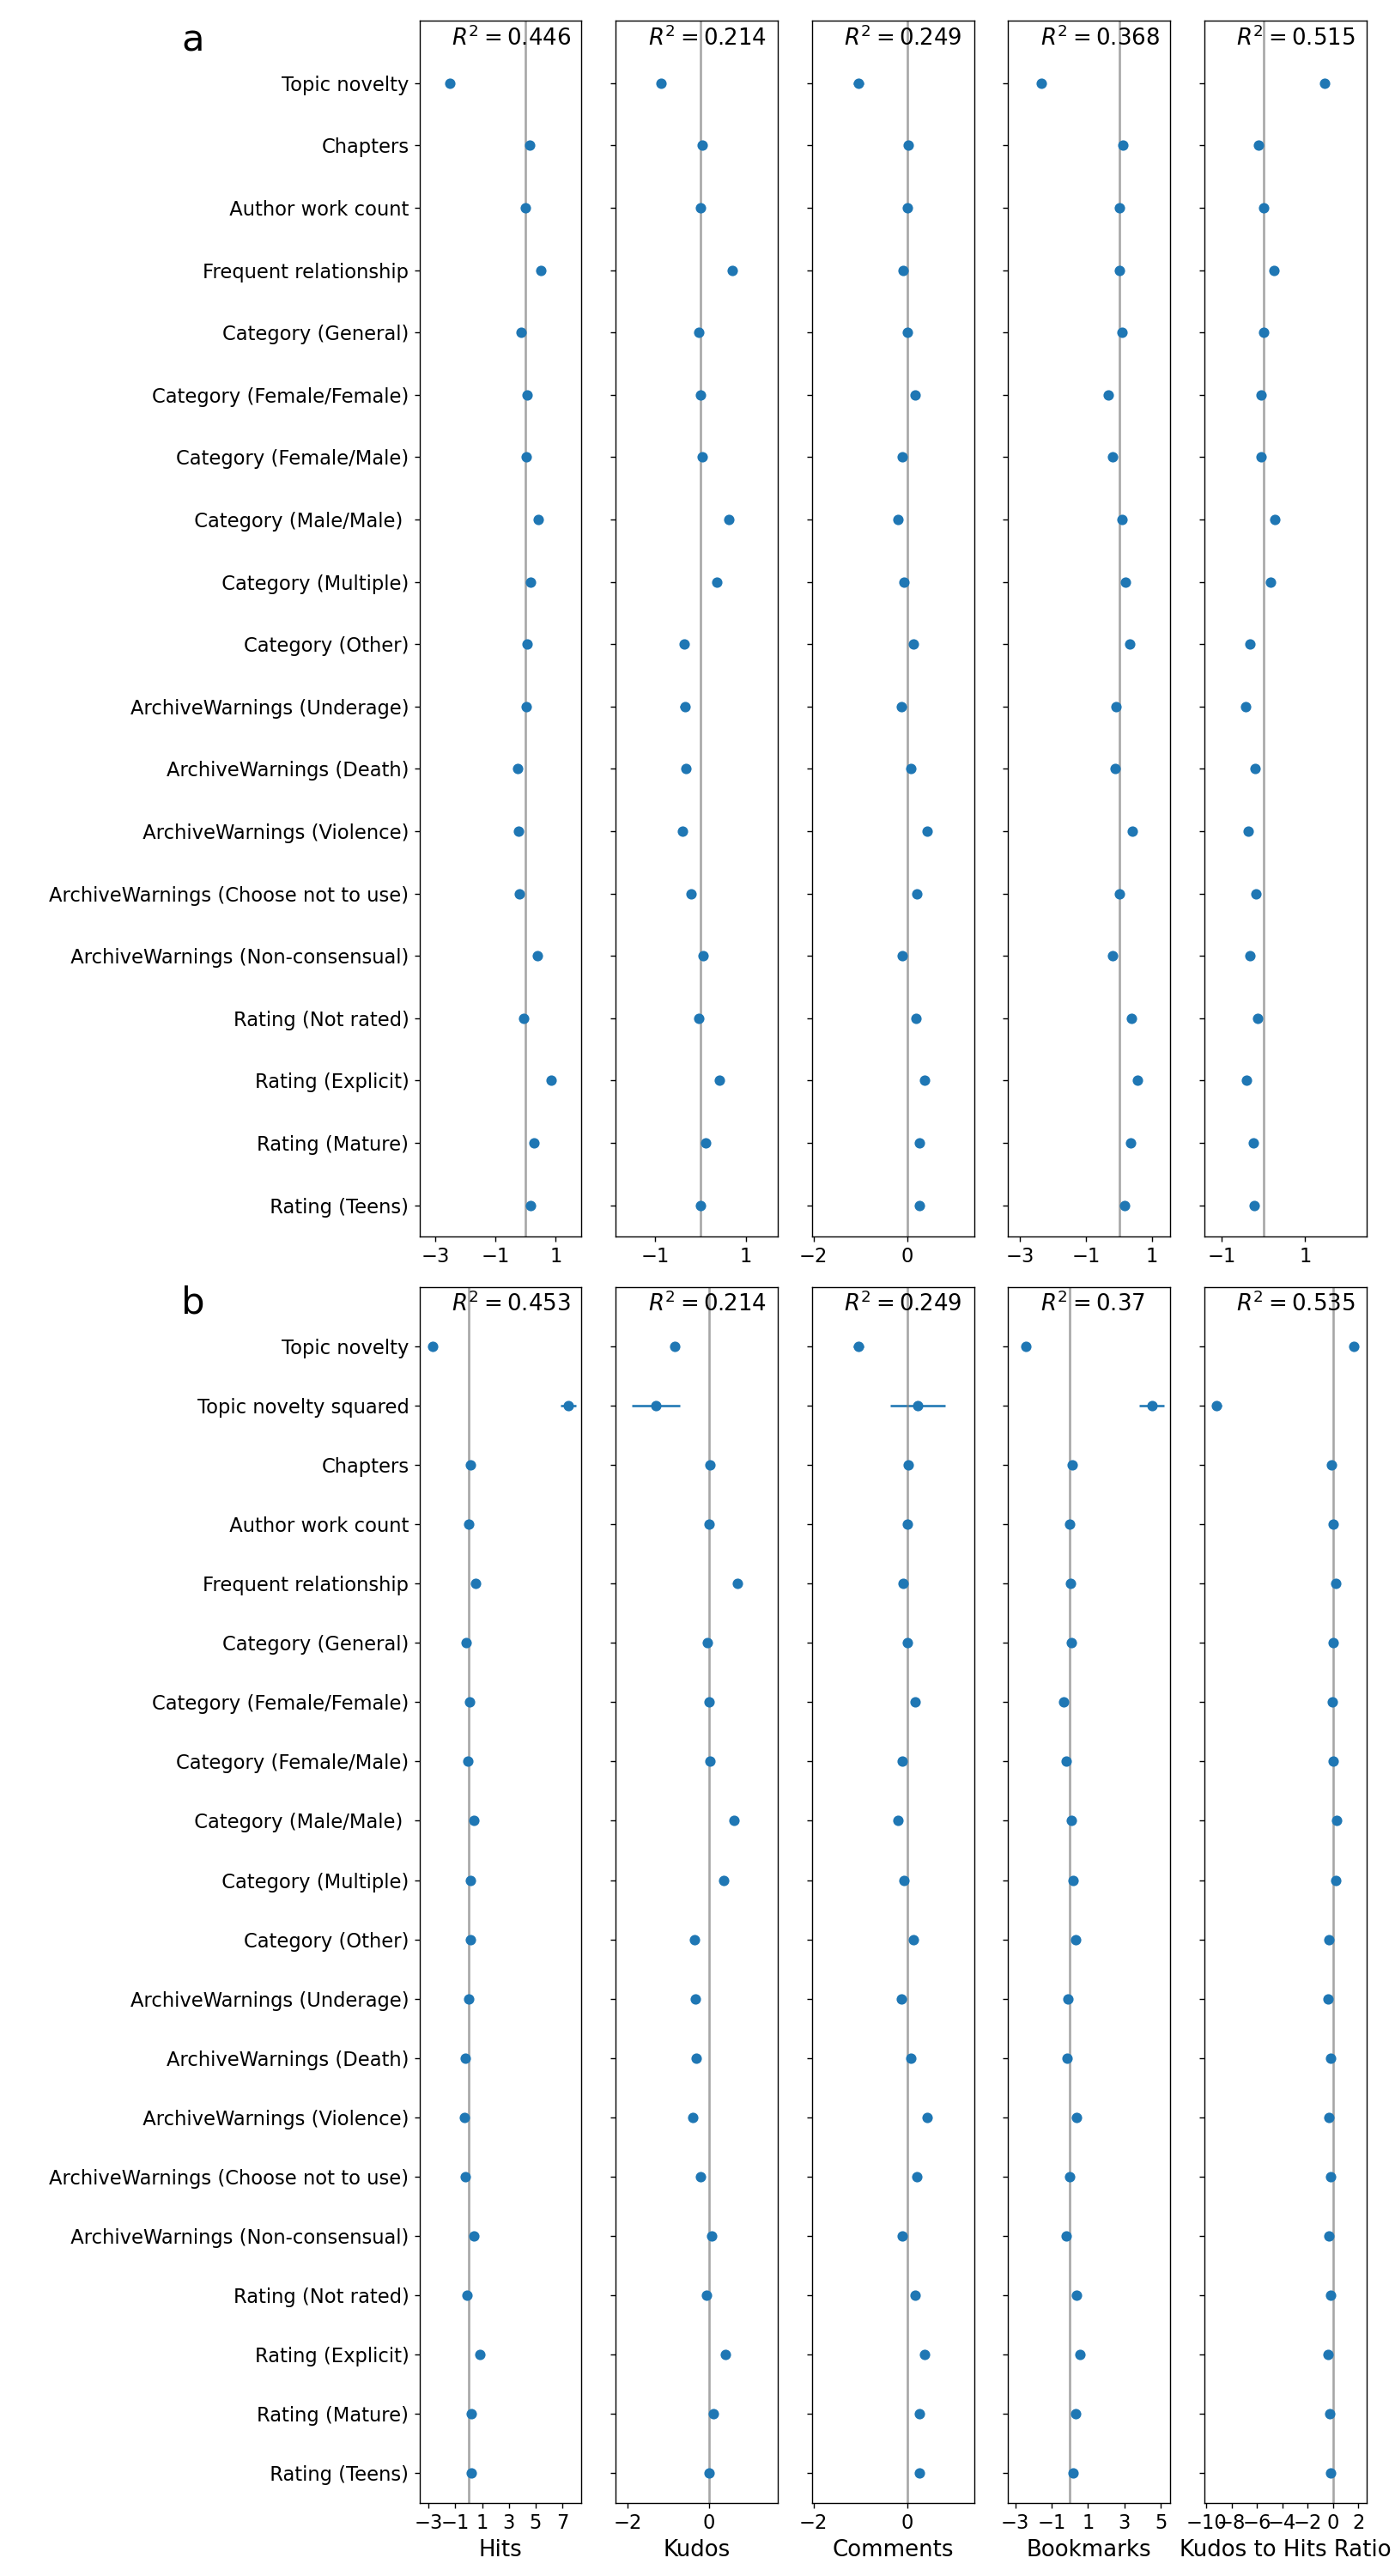

In [142]:
plot_fig(partial=False)